In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf

In [2]:
model =  tf.keras.models.load_model('model_CF.h5')

In [4]:
user_embeddings = model.get_layer('embedding_4').get_weights()[0]
movie_embeddings = model.get_layer('embedding_5').get_weights()[0]

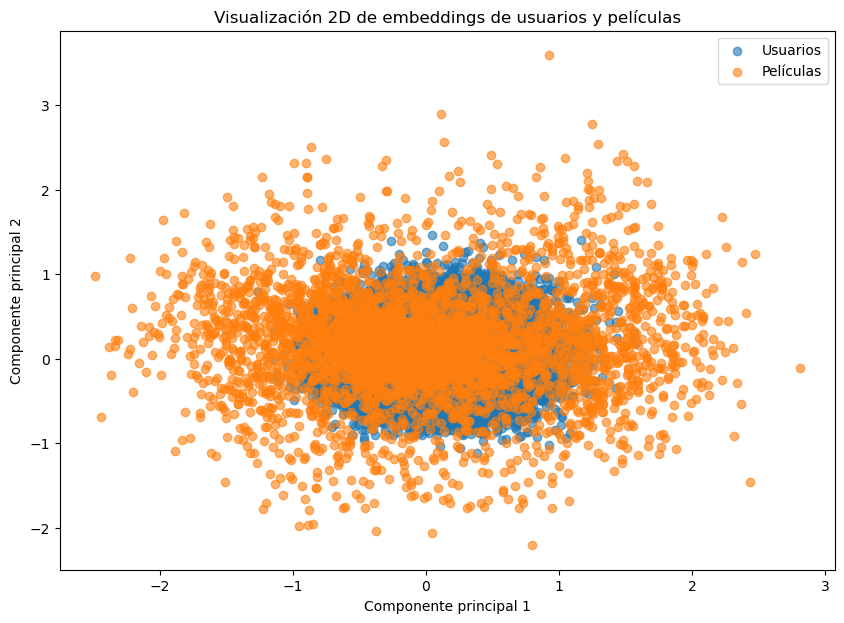

In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Usar PCA para reducir dimensionalidad a 2D
pca = PCA(n_components=2)
user_embeddings_2d = pca.fit_transform(user_embeddings)
movie_embeddings_2d = pca.fit_transform(movie_embeddings)

# Visualizar embeddings
plt.figure(figsize=(10, 7))
plt.scatter(user_embeddings_2d[:, 0], user_embeddings_2d[:, 1], label='Usuarios', alpha=0.6)
plt.scatter(movie_embeddings_2d[:, 0], movie_embeddings_2d[:, 1], label='Películas', alpha=0.6)
plt.legend()
plt.title('Visualización 2D de embeddings de usuarios y películas')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

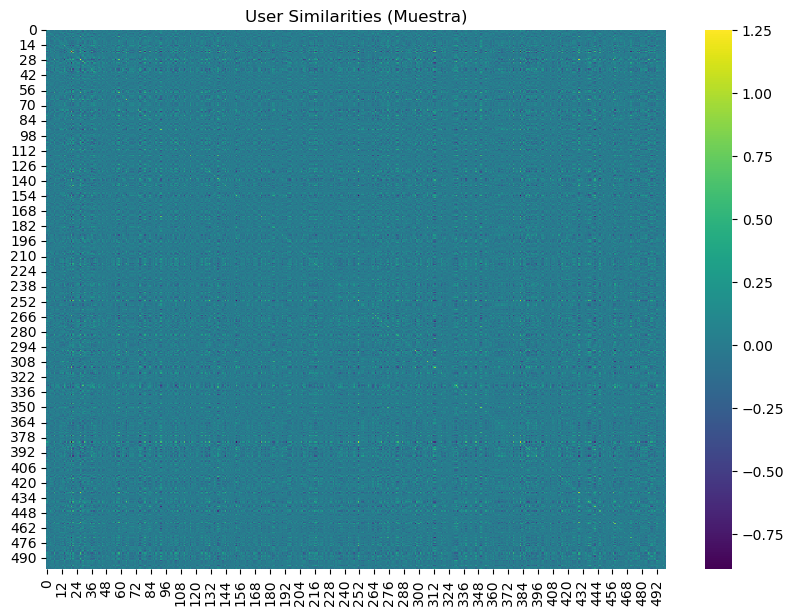

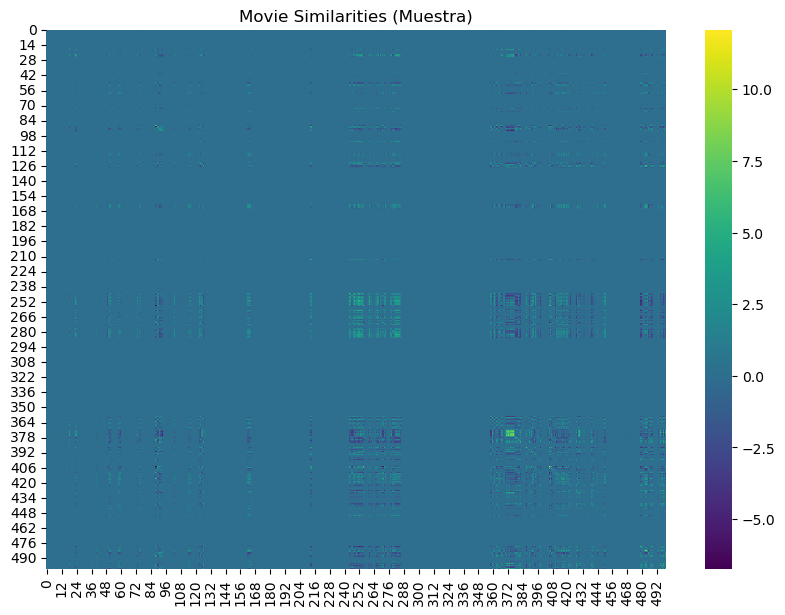

In [56]:
import seaborn as sns
import numpy as np

# Subconjunto de usuarios y películas (por memoria)
num_samples = 500
sample_user_embeddings = user_embeddings[1000:1000+num_samples]
sample_movie_embeddings = movie_embeddings[1000:1000+num_samples]

# Calcular similitudes para el subconjunto
user_similarities = np.dot(sample_user_embeddings, sample_user_embeddings.T)
movie_similarities = np.dot(sample_movie_embeddings, sample_movie_embeddings.T)

# Visualizar como heatmaps
plt.figure(figsize=(10, 7))
sns.heatmap(user_similarities, cmap='viridis')
plt.title('User Similarities (Muestra)')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(movie_similarities, cmap='viridis')
plt.title('Movie Similarities (Muestra)')
plt.show()

Usuarios más similares al usuario 1: [(71625, 0.997972413608151), (4538, 0.9972037387649021), (22362, 0.9970018113910754), (85734, 0.9948215339578195), (152850, 0.9938275826833529)]
Películas más similares a la película 10: [(66451, 0.9971641724456406), (104347, 0.9970087868988152), (175277, 0.9967502852013903), (65621, 0.9965431658206544), (14111, 0.9956614593184537)]


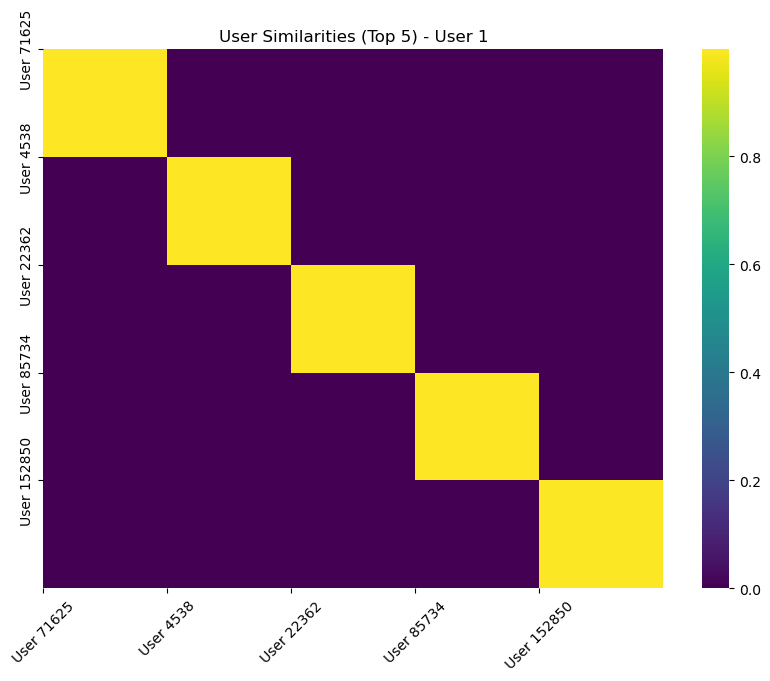

In [49]:
from scipy.spatial.distance import cosine

def most_similar(embedding_matrix, index, top_n=5):
  similarities = []
  target_vector = embedding_matrix[index]
  for i, vector in enumerate(embedding_matrix):
    if i != index:
      similarity = 1 - cosine(target_vector, vector)  # Cosine similarity
      similarities.append((i, similarity))
  similarities.sort(key=lambda x: x[1], reverse=True)  # Sort by descending similarity
  return similarities[:top_n]

# Example usage (assuming you have user_embeddings and movie_embeddings)

# Get most similar users to user 1 (change 1 to desired user ID)
user_id = 1
movie_id = 20
similar_users = most_similar(user_embeddings, user_id)
print("Usuarios más similares al usuario 1:", similar_users)

# Ejemplo: Obtener las películas más similares a la película con ID 10
similar_movies = most_similar(movie_embeddings, movie_id)
print("Películas más similares a la película 10:", similar_movies)

# Extract user indices and similarity scores for heatmap
user_indices, user_similarities = zip(*similar_users)

# Create a heatmap showing similarities between target user and most similar users
plt.figure(figsize=(10, 7))
sns.heatmap(np.diag(user_similarities), cmap='viridis')

# Customize heatmap labels (optional)
user_labels = [f"User {i}" for i in user_indices]
plt.xticks(ticks=np.arange(len(user_labels)), labels=user_labels, rotation=45)
plt.yticks(ticks=np.arange(len(user_labels)), labels=user_labels)

plt.title(f"User Similarities (Top {len(user_indices)}) - User {user_id}")
plt.show()